                                       #Ridge Regression – Boston Housing Price Prediction

## Problem Statement

The goal of this project is to predict Boston house prices based on multiple features.

## 1.Importing Libraries

In [56]:
import numpy as np
import pandas as pd
    
from sklearn.model_selection import train_test_split,cross_val_score,RepeatedKFold
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score

## 2.Data Loading and Understanding

In [57]:
df=pd.read_csv("boston_housing.csv")
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    float64
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


## 3.Feature & Target Split

In [59]:
X=df.drop(["medv"],axis=1)
y=df["medv"]

## 4.Train–Test Split

In [60]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

## 5.Ridge Regression Model

In [61]:
Ridge_model=Ridge(alpha=1).fit(X_train,y_train)
Ridge_model.intercept_

np.float64(24.878370472969394)

In [62]:
y_pred=Ridge_model.predict(X_test)

In [63]:
#View Actual vs Predicted
comparison = pd.DataFrame({
    "Actual_Value": y_test.values,
    "Predicted_Value": y_pred
})

comparison.head()

,Actual_Value,Predicted_Value
0,23.6,28.540649
1,32.4,35.715517
2,13.6,14.420098
3,22.8,25.048141
4,16.1,19.202345


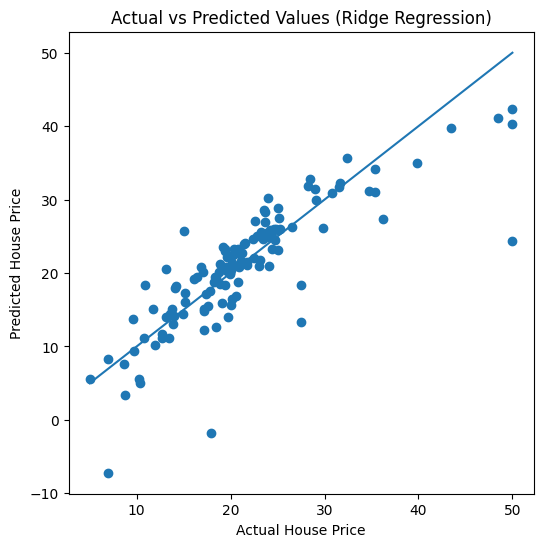

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()])

plt.xlabel("Actual House Price")
plt.ylabel("Predicted House Price")
plt.title("Actual vs Predicted Values (Ridge Regression)")
plt.show()

## 6.Model Evaluation

In [65]:
#RMSE
np.sqrt(mean_squared_error(y_test,y_pred))

np.float64(4.741357980709098)

In [66]:
#Add Error Column
comparison["Error"] = comparison["Actual_Value"] - comparison["Predicted_Value"]
comparison.head()

,Actual_Value,Predicted_Value,Error
0,23.6,28.540649,-4.940649
1,32.4,35.715517,-3.315517
2,13.6,14.420098,-0.820098
3,22.8,25.048141,-2.248141
4,16.1,19.202345,-3.102345


In [67]:
##Model Coefficients
Ridge_model.coef_

array([-0.12383039,  0.03139178,  0.01767668,  2.54277179, -8.77249222,
        4.37980204, -0.01537349, -1.29086084,  0.24406848, -0.01082435,
       -0.83346553,  0.01348642, -0.53435396])

In [68]:
#R² Score
r2_score(y_test,y_pred)

0.678974832784608

## 7.Hyperparameter Tuning using GridSearchCV

In [69]:
#Choosing the Right Alpha
from sklearn.model_selection import GridSearchCV
cv=RepeatedKFold(n_splits=10,n_repeats=3,random_state=1)

#define grid
grid=dict()
grid['alpha']=np.arange(0,1,0.1)
model=Ridge()
search=GridSearchCV(model,grid,scoring='neg_mean_absolute_error',cv=cv,n_jobs=-1)

results=search.fit(X_train,y_train)
print("MAE:%.3f" %results.best_score_)
print("Config:%s" %results.best_params_)

MAE:-3.500
Config:{'alpha': np.float64(0.7000000000000001)}


In [70]:
#Training the Final Ridge Model
Ridge_model=Ridge(alpha=0.7,).fit(X_train,y_train)
y_pred=Ridge_model.predict(X_test)

In [71]:
#RMSE after tuning
np.sqrt(mean_squared_error(y_test,y_pred))

np.float64(4.731437210393682)

After tuning the regularization parameter, the final Ridge model achieved an RMSE of 4.73, indicating stable and generalized predictions.

In [72]:
#Final Model Performance – R² Score (After Tuning)
r2_score(y_test,y_pred)

0.6803168470441052

After tuning, the Ridge model achieved an R² of 0.68, explaining most of the price variation while maintaining generalization.

In [73]:
##Model Coefficients
pd.Series(Ridge_model.coef_,index=X_train.columns)

crim       -0.124643
zn          0.031027
indus       0.023550
chas        2.595725
nox       -10.178221
rm          4.382223
age        -0.014263
dis        -1.311503
rad         0.246439
tax        -0.010654
ptratio    -0.850029
black       0.013431
lstat      -0.530846
dtype: float64

## 8.Feature Importance Ranking

In [74]:
pd.Series(Ridge_model.coef_, index=X.columns).abs().sort_values(ascending=False)

nox        10.178221
rm          4.382223
chas        2.595725
dis         1.311503
ptratio     0.850029
lstat       0.530846
rad         0.246439
crim        0.124643
zn          0.031027
indus       0.023550
age         0.014263
black       0.013431
tax         0.010654
dtype: float64

## Final Project Conclusion

In this project, Ridge Regression was used to predict Boston housing prices based on multiple socioeconomic and environmental factors. The dataset was clean, with no missing values, making it suitable for regression modeling.

Ridge Regression was chosen to handle multicollinearity among features and to reduce overfitting by shrinking coefficient values. Hyperparameter tuning using GridSearchCV identified the optimal regularization strength (alpha = 0.7), which improved model stability and generalization.

The final model achieved:

R² ≈ 0.68, meaning it explains about 68% of the variation in house prices.

RMSE ≈ 4.73, indicating an average prediction error of around $4.7k.

Feature analysis showed that:

Pollution (nox), number of rooms (rm), and location near the river (chas) are the most influential factors.

Environmental quality and house size play a major role in determining house prices.

Ridge regression provided balanced and interpretable coefficients without removing any features.

Overall, this project demonstrates how regularization and hyperparameter tuning improve model performance and reliability, making Ridge Regression a strong choice for real-world regression problems with correlated features.